In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [3]:
# load Pivot data
url = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/LB.csv'
df = pd.read_csv(url, delimiter=';')
# Menentukan input and output
X = df.drop(columns=["GOAL","7MACC","9MACC","6MACC","WINGACC","PIVOTACC","FASTBREAKACC"])
y = df.GOAL
# Membagi data set 80 : 20 train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalisasi nilai 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Merancang Neural Network Model
model = Sequential()
model.add(Flatten(input_shape=(6,)))  
model.add(RBFLayer(6, 0.5))
model.add(Dense(1, activation='linear'))  
model.compile(optimizer='RMSprop', loss=mean_squared_error)  
# Melatih arsitektur model terhadap dataset
model.fit(X_train, y_train, batch_size=8, epochs=100)
# Melakukan prediksi nilai
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Epoch 1/100
151/151 [==============================] - 1s 1ms/step - loss: 5.3535
Epoch 2/100
151/151 [==============================] - 0s 1ms/step - loss: 4.8823
Epoch 3/100
151/151 [==============================] - 0s 1ms/step - loss: 4.5602
Epoch 4/100
151/151 [==============================] - 0s 1ms/step - loss: 4.3055
Epoch 5/100
151/151 [==============================] - 0s 1ms/step - loss: 4.1143
Epoch 6/100
151/151 [==============================] - 0s 1ms/step - loss: 3.9700
Epoch 7/100
151/151 [==============================] - 0s 1ms/step - loss: 3.8416
Epoch 8/100
151/151 [==============================] - 0s 1ms/step - loss: 3.7228
Epoch 9/100
151/151 [==============================] - 0s 1ms/step - loss: 3.6214
Epoch 10/100
151/151 [==============================] - 0s 1ms/step - loss: 3.5230
Epoch 11/100
151/151 [==============================] - 0s 927us/step - loss: 3.4338
Epoch 12/100
151/151 [==============================] - 0s 1ms/step - loss: 3.3399
Epoch 13/10

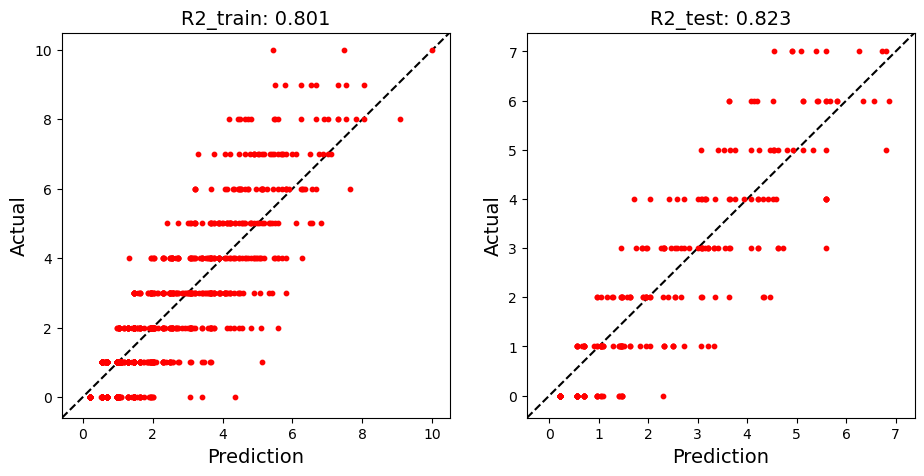

Mean Squared Error (MSE) 0.8241738107625004
Mean Absolute Error (MAE) 0.670128800616359


In [4]:
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)
    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, pred_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, pred_test)
    print(f"Mean Squared Error (MSE)",mse)
    print(f"Mean Absolute Error (MAE)",mae)
   


In [5]:
urlshot = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/Sensitivity/SHOTATTEMPT.csv'
shot_df = pd.read_csv(urlshot, delimiter = ';')
# Normalisasi nilai 
scaler = MinMaxScaler()
shot_df = scaler.fit_transform(shot_df)
shot_sensitivity = model.predict(shot_df)
print(shot_sensitivity)

2/2 [==============================] - 0s 3ms/step
[[ 0.01276612]
 [ 0.29026455]
 [ 0.62722194]
 [ 0.976627  ]
 [ 1.269852  ]
 [ 1.4375032 ]
 [ 1.4358896 ]
 [ 1.2654442 ]
 [ 0.9705366 ]
 [ 0.01276612]
 [ 0.739169  ]
 [ 1.6400908 ]
 [ 2.5988183 ]
 [ 3.4341762 ]
 [ 3.9526265 ]
 [ 4.020383  ]
 [ 3.6192653 ]
 [ 2.8545878 ]
 [ 0.01276612]
 [ 0.6766082 ]
 [ 1.5230998 ]
 [ 2.3764515 ]
 [ 3.1045282 ]
 [ 3.6454418 ]
 [ 4.0005274 ]
 [ 4.2082543 ]
 [ 4.317136  ]
 [ 0.01276612]
 [-0.01164818]
 [-0.0529654 ]
 [-0.10148454]
 [-0.14781046]
 [-0.18565369]
 [-0.2127161 ]
 [-0.22986722]
 [-0.23957205]
 [ 0.01276612]
 [ 0.4056874 ]
 [ 0.8092533 ]
 [ 1.1431589 ]
 [ 1.3278174 ]
 [ 1.3149531 ]
 [ 1.1080186 ]
 [ 0.76069814]
 [ 0.35437387]
 [ 0.01276612]
 [ 0.30876046]
 [ 0.6972828 ]
 [ 1.1395805 ]
 [ 1.5621095 ]
 [ 1.8736479 ]
 [ 1.9966118 ]
 [ 1.8982947 ]
 [ 1.6049373 ]]


In [6]:
pd.DataFrame(shot_sensitivity).to_csv('sensitivitasshot.csv', index=False)